In [ ]:
#Signal Processing Homework
#First Name:Yashar
#Last Name:Movahedi
#Student Number:0232113102
#Program:Master Of Data Science (Winter2023-2024)
#For this reason, I chose to use Python software because i like to make a challenge with myself and I wanted to know how I can do image processing in Python and use it in the future, because I am good with Python software, but I could not do calculations before signal training. I will do the signal and thank you for this training.

# 1)
Load the file Im1.jpg in Im1. Display the image and describe the problem with this image.

In [3]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D


In [4]:
image_path = 'Im1.jpg'
img_rgb = cv2.imread(image_path)


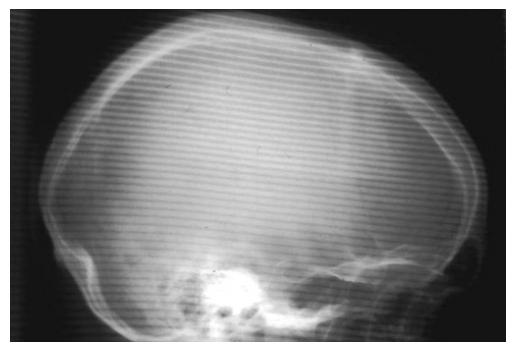

In [5]:
# OpenCV reads images in BGR format, convert it to RGB for displaying with Matplotlib
#We have a few issues with this image.There's some weird horizontal noise, a faint white spot on the left, and the dark pixels aren't as expected. Also, there are these noticeable vertical stripes making the picture a bit messy.
img = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)

plt.imshow(img_rgb)
plt.axis('off')
plt.show()

## 2)
Use a mean filter of size 3×3 and 5×5 to denoise. Display and comment the results.

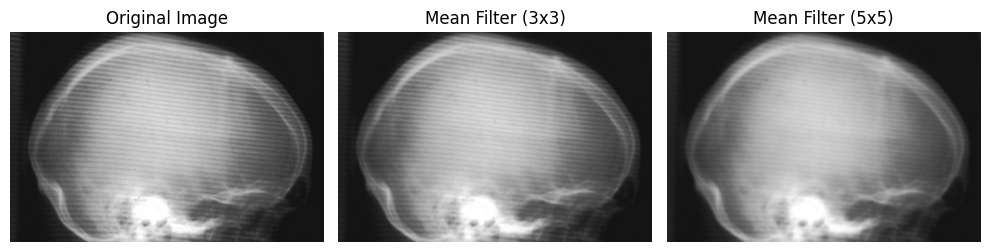

In [6]:

# Apply mean filters of size 3x3 and 5x5
mean_filter_3x3 = cv2.blur(img, (3, 3))
mean_filter_5x5 = cv2.blur(img, (5, 5))

plt.figure(figsize=(10, 5))

plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(mean_filter_3x3, cv2.COLOR_BGR2RGB))
plt.title('Mean Filter (3x3)')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(mean_filter_5x5, cv2.COLOR_BGR2RGB))
plt.title('Mean Filter (5x5)')
plt.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
#We can see that The 5x5 mean filter works better than the 3x3 one, making the white noisy lines less visible and disappearing a bit, while the 3x3 filter shows more clear lines.

# 3&4)
Compute and display the amplitude of the Fourier Transform of Im1.
Detect in the amplitude of the spectrum the noise patterns which might be due to
the Moiré effect. Write the commands to detect/display these zones of the matrix.
(Inspect the position by hand in the matrix/image, then check in the matrix of the
amplitude, there should be be 4 “anomalies”).

In [7]:
img.shape

(339, 505)

the shape of the image is:  (339, 505)


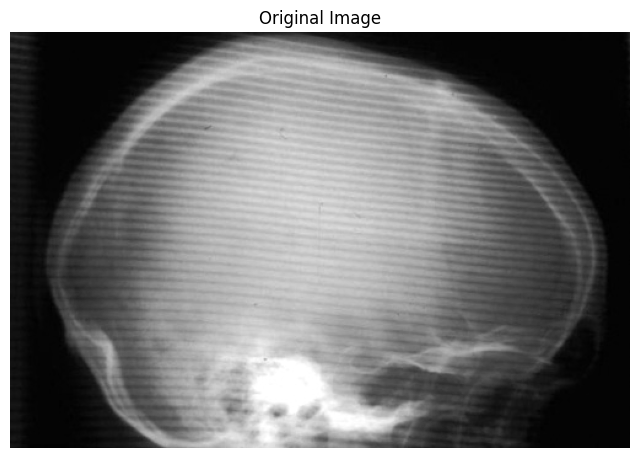

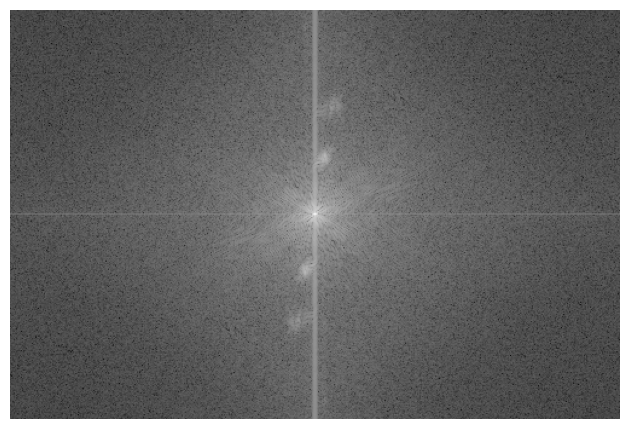

In [8]:
#In this part,we have to Compute and display the amplitude of the Fourier Transform of Im1
img_fft_raw = np.fft.fft2(img)
img_fft = np.fft.fftshift(img_fft_raw)
img_fft_amp = np.log1p(np.abs(img_fft))

print("the shape of the image is: ", img_fft_amp.shape)

# Display amplitude spectrum
plt.figure(figsize=(8, 8))

plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.show()
plt.imshow(img_fft_amp, cmap='gray')
plt.title('')
plt.axis('off')

plt.tight_layout()
plt.show()

In [9]:
img_fft_amp.min()

0.205837155513682

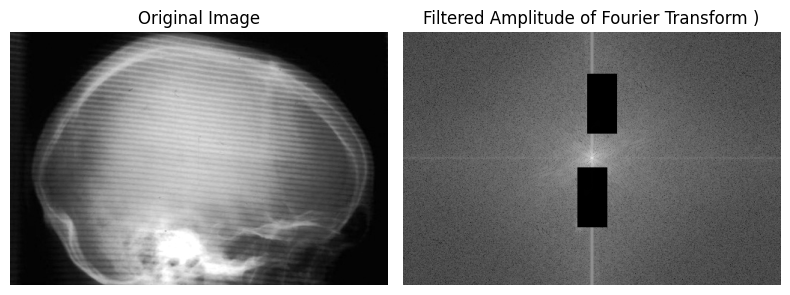

In [10]:
#Here,We manually identified the positions of the noisy regions by inspecting the amplitude of FFt of Im1.
rec_locs = [(97, 266),(222, 253)]
rec_width = [20,20]
rec_height =[40,40]

img_fft_raw = np.fft.fft2(img)
img_fft = np.fft.fftshift(img_fft_raw)
img_fft_amp = np.log1p(np.abs(img_fft))

for (x, y), w,h in zip(rec_locs, rec_width, rec_height):
    img_fft_amp[x - h : x + h, y - w : y + w] *= 0.01


# Display the amplitude spectrum of the notch-filtered Fourier Transform
plt.figure(figsize=(8, 8))

plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img_fft_amp, cmap='gray')
plt.title('Filtered Amplitude of Fourier Transform )')
plt.axis('off')

plt.tight_layout()
plt.show()

# 5)
Propose a filter h, which will be defined in the frequency domain and which should
allow to discard the problematic frequencies. Construct F(h) and display |F(h)|.


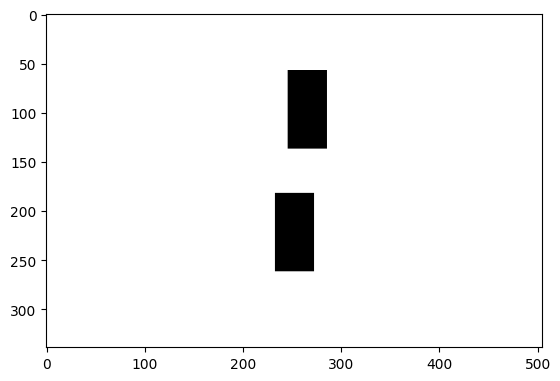

In [17]:
# Assuming 'img' is the input image and 'rec_locs', 'rec_diameter' are defined
H = np.ones(img.shape)
rec_locs = [(97, 266),(222, 253)]
rec_width = [20,20]
rec_height =[40,40]
for (x, y), w,h in zip(rec_locs, rec_width, rec_height):
    H[x - h : x + h, y - w : y + w] = 0

plt.imshow(H, cmap='gray')
# plt.axis('off')
plt.show()

# 6)
Compute F(h ∗ Im1) and display |F(h ∗ Im1)|

In [12]:
print()

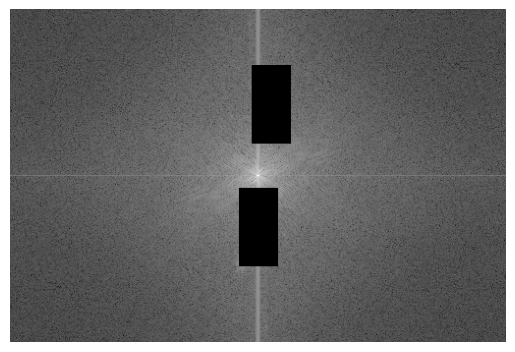

In [18]:
# Assuming 'img_fft', 'h' are defined

filtered_spectrum = img_fft * H
filtered_magnitude = np.log1p(np.abs(filtered_spectrum))

plt.imshow(filtered_magnitude, cmap='gray')
plt.axis('off')
plt.show()

# 7)
Compute and display h ∗ Im1.

0.0


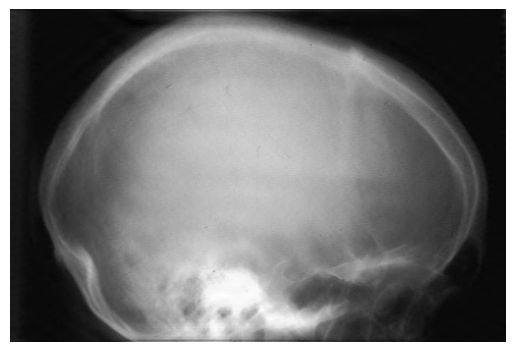

In [25]:
filtered_img = np.fft.ifft2(np.fft.ifftshift(filtered_spectrum))
filtered_img = np.abs(filtered_img)

# Normalize the pixel values to adjust brightness
normalized_img = (filtered_img - np.min(filtered_img)) / (np.max(filtered_img) - np.min(filtered_img))
print(normalized_img.min())
plt.imshow(normalized_img, cmap='gray')
plt.axis('off')
plt.show()